# DATA 550 - Lab 1 - Visualizing world health data

In this lab we will be using both R and Python,
and for each question you will develop an answer both in `ggplot` and in `Altair`.
Although the `%%R` cell magic makes it convenient for us to do this in the same notebook,
I would still recommend that you use a separate Jupyter Notebook with a dedicated R kernel
or RStudio to develop your R code.
The reasons for this are that autocompletion works better there
and the error messages are easier to understand.
Once you have developed the code for a question
you can paste it into the corresponding R cell here
and make sure it runs and shows up in the exported HTML.

<div class="alert alert-info" style="color:black">

## Submission instructions
rubric={mechanics:2}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li>Create a GitHub Repo for your group. 
      <ul>
          <li>Keep this organized, i.e. with a separate clearly marked folder for each assignment.</li>
    </ul>
  </li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab.</li>

  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2025/DATA_550_labX_groupY.</li>
    </ul>
  </li>
  <li>Upload a <code>.html</code> version of your assignment to Canvas.
    <ul>
      <li> Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`</li>
      <li> Convert your notebook to .html format using `File -> Save and Export Notebook As -> HTML`</li>
      <li> Submit and double check that your have submitted the correct file to Canvas </li>
    </ul>
  </li>
</ul>
</div>

https://github.com/Christian-Ji/data_550_Dataviz_1.git

In [1]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

# Load the R cell magic
%load_ext rpy2.ipython

# 1. Get motivated!

You have already worked with the Gapminder world health data set in the previous block
and we will revisit an updated version of it in this lab.
The Gapminder foundation strives to educate people about the public health status
in countries all around the world
and fight devastating misconceptions that hinder world development.
This information is important both for our capacity to make considerate choices as individuals,
and from an industry perspective in understanding where markets are emerging.
In their research,
Gapminder has discovered that most people don't really know what the world looks like today.
Do you?
[Take this 7-8 min quiz to find out](https://forms.gapminder.org/s3/test-2018).

This quiz is not easy,
so don't worry if you get a low score.
I took this quiz for the first time a few years back and I didn't do too well myself =)
It is primarily meant to spark your curiosity to learn more about this lab's data set!
When you are done,
[please submit your score in this Google form](https://docs.google.com/forms/d/e/1FAIpQLSc2B0wlF-QWqAeJnHbu534WT-Twhpetk_4uUMM3LZvV0wv0mg/viewform?usp=sf_link).
This is anonymous,
I just want to explore if we can use the the distribution of scores
for something interesting in class or future labs.

<div class="alert alert-info" style="color:black">

### Question 1.1
rubric={reasoning:1,writing:1}

<p>To answer the first lab question
<a href=https://www.youtube.com/watch?v=usdJgEwMinM>watch this 20 min video of Hans Rosling</a>
a public health professor at Karolinska Institute
who founded Gapminder together with his son and his son's wife.
Although the video is almost 15 years old,
it is a formidable demonstration on how to present data in a way that engages your audience
while conveying a strong, important message.
(The original clip has over 3 million views,
but I linked you one of better video quality).</p>

<p>Briefly describe (&lt;=90 words)
what you think is the most important message conveyed in the video
and which data visualization you think was the most effective
in getting this message across to the viewers.</p>
    
</div>

YOUR ANSWER GOES HERE

The most important message is that many people’s mental picture of the world is outdated: most countries have made major progress in health and living standards, although the pace differs across regions. The most effective visualization is the animated Gapminder bubble chart (income on the x-axis, life expectancy on the y-axis, bubble size for population, color for region). It clearly shows multiple variables and change over time, making trends, gaps, and outliers easy to see.

# 2. The Gapminder bubble chart

The "bubble chart" have become quite famous from their appearance in the Gapminder talks,
and are widely used in other areas as well.
Let's start by recreating a simple version of this chart ourselves!

There will be some data wrangling involved in this lab,
and since 531 is primarily about visualization and this is the first lab,
I will give you some hints for most data wrangling parts of this lab.
Often I will link documentation or StackOverflow,
so that you get practice finding information on these sources,
and sometimes you will need to search them yourself if I haven't included a link.

To make this more interesting,
I have compiled a more recent version of the Gapminder dataset,
which contains values up until 2018 for most of the features.
We will not use all the columns in the data set,
but here is a description of what they contain
that you can refer back to throughout the lab.

| Column                | Description                                                                                  |
|-----------------------|----------------------------------------------------------------------------------------------|
| country               | Country name                                                                                 |
| year                  | Year of observation                                                                          |
| population            | Population in the country at each year                                                       |
| region                | Continent the country belongs to                                                             |
| sub_region            | Sub-region the country belongs to                                                            |
| income_group          | Income group [as specified by the world bank in 2018]                                                |
| life_expectancy       | The mean number of years a newborn would <br>live if mortality patterns remained constant    |
| income                | GDP per capita (in USD) <em>adjusted <br>for differences in purchasing power</em>            |
| children_per_woman    | Average number of children born per woman                                                    |
| child_mortality       | Deaths of children under 5 years <break>of age per 1000 live births                          |
| pop_density           | Average number of people per km<sup>2</sup>                                                  |
| co2_per_capita        | CO2 emissions from fossil fuels (tonnes per capita)                                          |
| years_in_school_men   | Mean number of years in primary, secondary,<br>and tertiary school for 25-36 years old men   |
| years_in_school_women | Mean number of years in primary, secondary,<br>and tertiary school for 25-36 years old women |

[as specified by the world bank in 2018]: https://datahelpdesk.worldbank.org/knowledgebase/articles/378833-how-are-the-income-group-thresholds-determined

<div class="alert alert-info" style="color:black">

### Question 2.1
rubric={accuracy:1,quality:1,viz:2}

<h4>Python</h4>
<ol type="1">
<li>I have uploaded the <a href=https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv> 2018 Gapminder data at this URL.</a> Use <code>read_csv</code> from <code>pandas</code> to load the data directly from the URL and assign it a suitable variable name. Set the <code>parse_dates</code> parameter to <code>['year']</code> to ensure that Altair recognizes this columns as time data.</li>
<li>Now let’s create a similar bubble chart to what you saw in the video:
<ul>
<li>Filter the dataframe to only keep observations from a single year, 1962. You can create a new data frame variable or perform the filtering directly as you pass the data to Altair. Dates can be matched as strings when filtering.</li>
<li>Use a circle mark to recreate the appearance of the plot in the video.</li>
<li>Encode the proper variables so that children per woman is on the x-axis, life expectancy on the y-axis, and so that the circles’ color corresponds to their region, and the size reflects the population.</li>
</ul></li>
</ol>
<p> Don't worry about getting axis labels and sizes to be exactly like in the video,
we will return to this code later in the lab to customize it.</p>
</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs

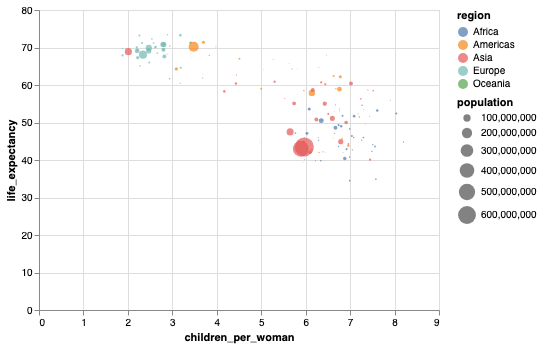

In [2]:
# YOUR PYTHON ANSWER GOES HERE
import pandas as pd
import altair as alt

# 1) Load data 
url = "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
gap = pd.read_csv(url, parse_dates=["year"])

# 2) Filter to a single year: 1962
gap_1962 = gap[gap["year"].dt.year == 1962].copy()

# 3) Bubble chart
chart = (
    alt.Chart(gap_1962)
    .mark_circle(opacity=0.7)
    .encode(
        x="children_per_woman:Q",
        y="life_expectancy:Q",
        color="region:N",
        size="population:Q",
        tooltip=[
            "country:N",
            "region:N",
            alt.Tooltip("income:Q", format=",.0f"),
            alt.Tooltip("life_expectancy:Q", format=".1f"),
            alt.Tooltip("children_per_woman:Q", format=".2f"),
            alt.Tooltip("population:Q", format=",.0f"),
        ],
    )
)

chart

<div class="alert alert-success" style="color:black">

### Question 2.2
rubric={accuracy:1,quality:1,viz:2}

<h4>
R
</h4>
<ol type="1">
<li>I have uploaded the <a href=https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv> 2018 Gapminder data at this URL and assign it a suitable variable name.</a> Use <code>read_csv</code> from <code>readr</code> to load the data directly from the URL.</li>
<li>Now let’s create a similar bubble chart to what you saw in the video:
<ul>
<li>Filter the dataframe to only keep observations from a single year, 1962. You can create a new data frame variable or (preferably) perform the filtering directly and pipe it to ggplot. Dates can be matched as strings when filtering.</li>
<li>Use a point geom to recreate the appearance of the plot in the video.</li>
<li>Encode the proper variables so that children per woman is on the x-axis, life expectancy on the y-axis, and so that the circles’ color corresponds to their region, and the size reflects the population.</li>
</ul></li>
</ol>
<p> Don't worry about getting axis labels and sizes to be exactly like in the video,
we will return to this code later in the lab to customize it.</p>
</div>

Rows: 38982 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): country, region, sub_region, income_group
dbl (10): year, population, life_expectancy, income, children_per_woman, chi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



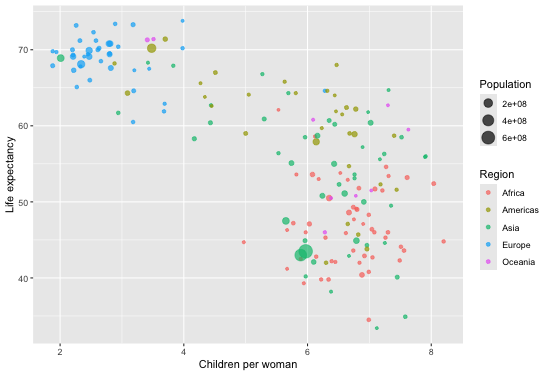

In [3]:
%%R -w 550 -h 375
# YOUR R ANSWER GOES HERE
library(readr)
library(dplyr)
library(ggplot2)

# 1) Load the data from the URL
url <- "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
gap <- read_csv(url)

# 2) Filter to a single year: 1962
gap_1962 <- gap %>%
  filter(year == 1962)

# 3) Bubble chart (point geom)
ggplot(gap_1962, aes(
  x = children_per_woman,
  y = life_expectancy,
  color = region,
  size = population
)) +
  geom_point(alpha = 0.7) +
  labs(
    x = "Children per woman",
    y = "Life expectancy",
    color = "Region",
    size = "Population"
  )

# 3. Education balance

A common misconception is that women around the world go to school many years less than men. Let’s find out what the data actually says about this.

<div class="alert alert-info" style="color:black">

### Question 3.1
rubric={accuracy:2,quality:1,viz:2}

<h4>
Python
</h4>
<ol type="1">
<li>Compute a new column in your dataframe that represents the ratio between the number of years in school for women and men (calculate it so that the value 1 means as many years for both, and 0.5 means half as many for women compared to men).</li>
<li>Filter the dataframe to only contain value from 1970 - 2015, since those are the years where the education data has been recorded. Again you can either create a new variable or perform the filtering as you pass the data to the plotting function.</li>
<li>Create a line plot showing how the ratio of women’s of men’s years in school has changed over time. Group the data by income group and plot the mean for each group.</li>
<li>Use layering to add a square mark for every data point in your line plot (so one per yearly mean in each group).</li>
</ol>

</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs

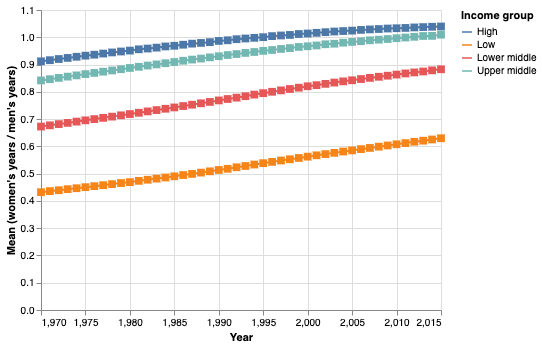

In [4]:
# YOUR PYTHON ANSWER GOES HERE
import pandas as pd
import altair as alt

# Load data
url = "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
gap = pd.read_csv(url)

# 1) Compute ratio: women / men years in school
gap["edu_ratio_women_men"] = gap["years_in_school_women"] / gap["years_in_school_men"]

# 2) Filter to 1970–2015 (inclusive)
gap_edu = gap[(gap["year"] >= 1970) & (gap["year"] <= 2015)].copy()

# 3) Line plot: mean ratio over time, grouped by income_group
base = (
    alt.Chart(gap_edu)
    .encode(
        x=alt.X("year:Q", title="Year"),
        y=alt.Y("mean(edu_ratio_women_men):Q", title="Mean (women's years / men's years)"),
        color=alt.Color("income_group:N", title="Income group"),
    )
)

line = base.mark_line()

# 4) Layer square marks for each yearly mean point
points = base.mark_square(size=60)

chart = line + points
chart

<div class="alert alert-success" style="color:black">

### Question 3.2
rubric={accuracy:2,quality:1,viz:2}

<h4>
R
</h4>
<ol type="1">
<li>Compute a new column in your dataframe that represents the ratio between the number of years in school for women and men (calculate it so that the value 1 means as many years for both, and 0.5 means half as many for women compared to men).</li>
<li>Filter the dataframe to only contain value from 1970 - 2015, since those are the years where the education data has been recorded. Again you can either create a new variable or perform the filtering as you pass the data to the plotting function.</li>
<li>Create a line plot showing how the ratio of women’s of men’s years in school has changed over time. Group the data by income group and plot the mean for each group.</li>
<li>Use layering to add a square mark for every data point in your line plot (so one per yearly mean in each group). Look into the `shape` parameter for `geom_point`.</li>
</ol>
</div>

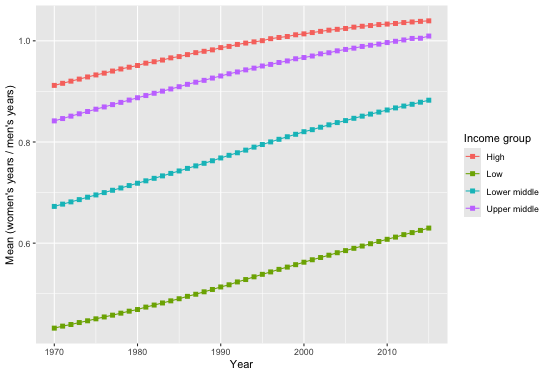

In [5]:
%%R -w 550 -h 375
# YOUR R ANSWER GOES HERE
library(readr)
library(dplyr)
library(ggplot2)

# Load data
url <- "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
gap <- read_csv(url, show_col_types = FALSE)

# 1) Compute ratio: women / men years in school
gap <- gap %>%
  mutate(edu_ratio_women_men = years_in_school_women / years_in_school_men)

# 2) Filter to 1970–2015
gap_edu <- gap %>%
  filter(year >= 1970, year <= 2015)

# 3) Line plot of the mean ratio over time, grouped by income_group
# 4) Layer square marks (shape = 15) for each yearly mean point
ggplot(gap_edu, aes(x = year, y = edu_ratio_women_men, color = income_group)) +
  geom_line(stat = "summary", fun = mean, na.rm = TRUE) +
  geom_point(stat = "summary", fun = mean, na.rm = TRUE, shape = 15, size = 2) +
  labs(
    x = "Year",
    y = "Mean (women's years / men's years)",
    color = "Income group"
  )

<div class="alert alert-warning" style="color:black">

### Question 3.3 (Optional)
rubric={accuracy:1}

<h4>
Python
</h4>
Add <a href=https://altair-viz.github.io/gallery/line_with_ci.html> a confidence interval band</a>
to your line + square plot by assigning the plot in the previous question to a variable name
and then using layering to add the band.
The default in the link above is a 95% bootstrapped confidence interval.
</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs

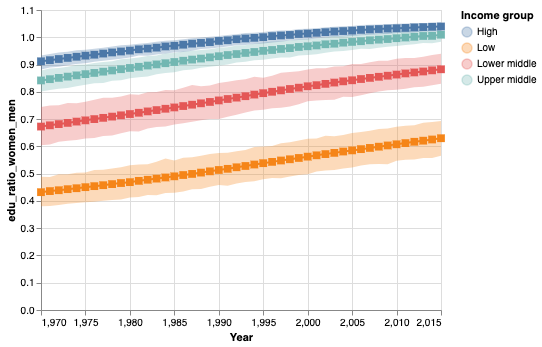

In [6]:
# YOUR PYTHON ANSWER GOES HERE
import pandas as pd
import altair as alt

# Load data
url = "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
gap = pd.read_csv(url)

# Compute ratio
gap["edu_ratio_women_men"] = gap["years_in_school_women"] / gap["years_in_school_men"]

# Filter years
gap_edu = gap[(gap["year"] >= 1970) & (gap["year"] <= 2015)].copy()

# Base encodings (same as Q3.1)
base = alt.Chart(gap_edu).encode(
    x=alt.X("year:Q", title="Year"),
    y=alt.Y("edu_ratio_women_men:Q", title="Mean (women's years / men's years)"),
    color=alt.Color("income_group:N", title="Income group"),
)

# 95% bootstrapped confidence interval band (errorband)
band = base.mark_errorband(extent="ci").encode(
    y=alt.Y("edu_ratio_women_men:Q"),
)

# Mean line
line = base.mark_line().encode(
    y=alt.Y("mean(edu_ratio_women_men):Q")
)

# Mean square points
points = base.mark_square(size=60).encode(
    y=alt.Y("mean(edu_ratio_women_men):Q")
)

band + line + points

<div class="alert alert-warning" style="color:black">

### Question 3.4 (Optional)
rubric={accuracy:1}

<h4>
R
</h4>
Add <a href=https://stackoverflow.com/a/32671983/2166823> a confidence interval band</a>
to your line + square plot by assigning the plot in the previous question to a variable name
and then using layering to add the band. Although the answer in that link uses <code>stat_summary(geom = 'ribbon'...)</code>,
you can use <code>geom_ribbon(stat = 'summary'...)</code> as we did in the lecture.
Also note that you need the <code>Hmisc</code> package installed to use <a href=https://ggplot2.tidyverse.org/reference/hmisc.html> the mean_cl_boot function</a>,
which you should use here to create a 95% bootstrapped confidence interval,
just as in the Python plot above.
    
</div>

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.2.0     ✔ tidyr     1.3.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 38982 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): country, region, sub_region, income_group
dbl (10): year, population, life_expectancy, income, children_per_woman, chi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


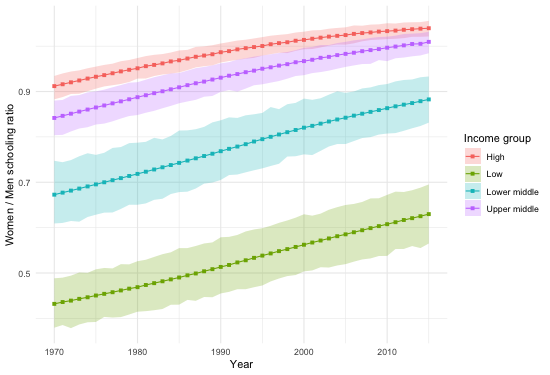

In [7]:
%%R -w 550 -h 375
# YOUR R ANSWER GOES HERE
library(tidyverse)

# Load data
url <- "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
gapminder <- read_csv(url)

# 1. Compute ratio
gapminder <- gapminder %>%
  mutate(edu_ratio = years_in_school_women / years_in_school_men)

# 2–4. Filter, summarise, plot with 95% CI
gapminder %>%
  filter(year >= 1970 & year <= 2015) %>%
  ggplot(
    aes(
      x = year,
      y = edu_ratio,
      color = income_group,
      fill  = income_group
    )
  ) +
  stat_summary(fun = mean, geom = "line") +
  stat_summary(fun = mean, geom = "point", shape = 15) +
  stat_summary(fun.data = mean_cl_boot,
               geom = "ribbon",
               alpha = 0.25,
               color = NA) +
  labs(
    x = "Year",
    y = "Women / Men schooling ratio",
    color = "Income group",
    fill  = "Income group"
  ) +
  theme_minimal()


# 4. Family planning

Another common misconception is that saving the lives of children in low income countries
will lead to overpopulation.
Rather,
lower child mortality is actually correlated with smaller family sizes.
As more children survive,
parents feel more secure with a smaller family size.
Let's have a look in the data to see how this relationship has evolved over time.

In the plots we are going to make,
it is important to note that it is not possible to tell causation,
just correlation.
However,
in the [Gapminder](https://www.gapminder.org/videos/) video library
there are a few videos on this topic
(including [this](https://www.gapminder.org/answers/will-saving-poor-children-lead-to-overpopulation/)
and [this](https://www.gapminder.org/videos/population-growth-explained-with-ikea-boxes/) one),
discussing how reducing poverty can help slow down population growth
through decreased family sizes.
Current estimates suggest that the word population
will stabilize around 11 billion people
and the average number of children per woman
will be close to two worldwide in year 2100.

<div class="alert alert-info" style="color:black">

### Question 4.1
rubric={accuracy:1,viz:2,reasoning:1}

<h4>
Python
</h4>
<ol type="1">
<li>Filter the data to include only the years 1918, 1938, 1958, 1978, 1998, and 2018. To do this, you need to write out the full date strings, <code>'1918-01-01'</code> etc, or use <code>pd.to_datetime</code> with <code>format=%Y</code> on a list of the year integers only, up to you which one.</li>
<li>Use filled circles to make a scatter plot with children per women on the x-axis, child mortality on the y-axis, and the circles colored by the income group.</li>
<li>Facet your data into six subplots, one for each year laid out in 3 columns and 2 rows. To avoid taking too much space, set the width and height of the plots to suitable numbers.</li>
<li>Briefly describe your interpretation of the data. Does it support what was written in the introduction to this section of the lab? Why / why not?</li>
</ol>
</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs

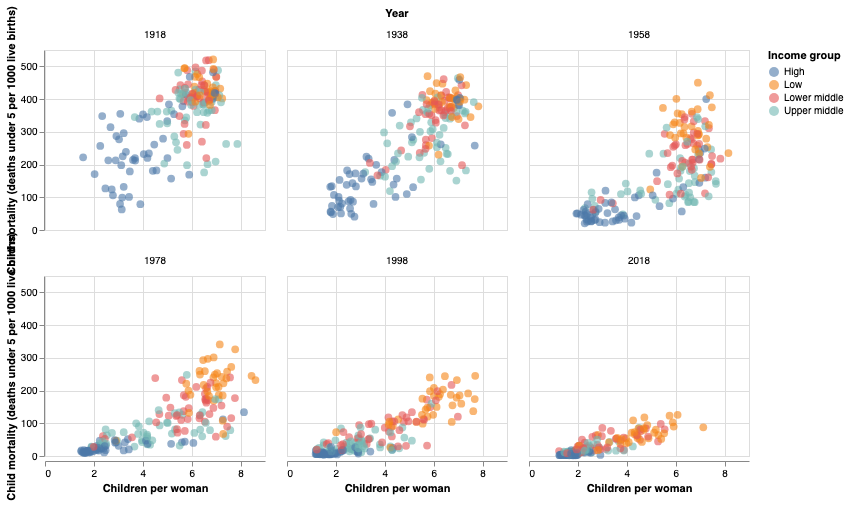

In [8]:
# YOUR PYTHON ANSWER GOES HERE
import pandas as pd
import altair as alt

# Load data
url = "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
df = pd.read_csv(url)

# Keep only the required years
years = [1918, 1938, 1958, 1978, 1998, 2018]
df_4 = df[df["year"].isin(years)].copy()

# Make year a string category for facet labels and ordering
df_4["year_str"] = df_4["year"].astype(str)
year_order = [str(y) for y in years]

# Base scatter plot
base = (
    alt.Chart(df_4)
    .mark_circle(filled=True, opacity=0.6, size=60)
    .encode(
        x=alt.X("children_per_woman:Q", title="Children per woman"),
        y=alt.Y("child_mortality:Q", title="Child mortality (deaths under 5 per 1000 live births)"),
        color=alt.Color("income_group:N", title="Income group"),
        tooltip=["country:N", "year:O", "income_group:N", "children_per_woman:Q", "child_mortality:Q"],
    )
    .properties(width=220, height=180)
)

# Facet into 3 columns (wrap) -> 3x2 for 6 years
chart = base.facet(
    facet=alt.Facet("year_str:N", title="Year", sort=year_order),
    columns=3
)

chart

YOUR ANSWER TO 4 GOES HERE

Across all years, there is a clear negative relationship between child mortality and life expectancy: countries with high child mortality tend to have much lower life expectancy. Over time (from 1918 to 2018), child mortality drops dramatically in every income group, and life expectancy increases, especially in low and lower-middle income countries. The pattern also shifts downward and to the right: as child mortality falls, many countries still move to higher “children per woman” at first, but by 2018 fertility is generally lower as well.

This supports the introduction. The plots show correlation, not causation, but the consistent trend across years and income groups matches the claim that improved survival and development are associated with longer lives and, eventually, smaller family sizes.

<div class="alert alert-success" style="color:black">

### Question 4.2
rubric={accuracy:1,viz:2,reasoning:1}

<h4>
R
</h4>
<ol type="1">
<li>Filter the data to include only the years 1918, 1938, 1958, 1978, 1998, and 2018.</li>
<li>Use <a href=https://stackoverflow.com/questions/15726907/ggplot-scatterplot-points-with-no-fill> hollow circles</a> to make a scatter plot with children per women on the x-axis, child mortality on the y-axis, and the circles colored by the income group.</li>
<li>Facet your data into six subplots, one for each year laid out in 3 columns and 2 rows.</li>
<li>I have already adjusted the ggplot figure size in this cell, but how could you do it if you were inside R Studio in either an R Markdown document or a script?</li>
</ol>
</div>

R callback write-console: In addition:   
R callback write-console: Warning message:
  
R callback write-console: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 
  


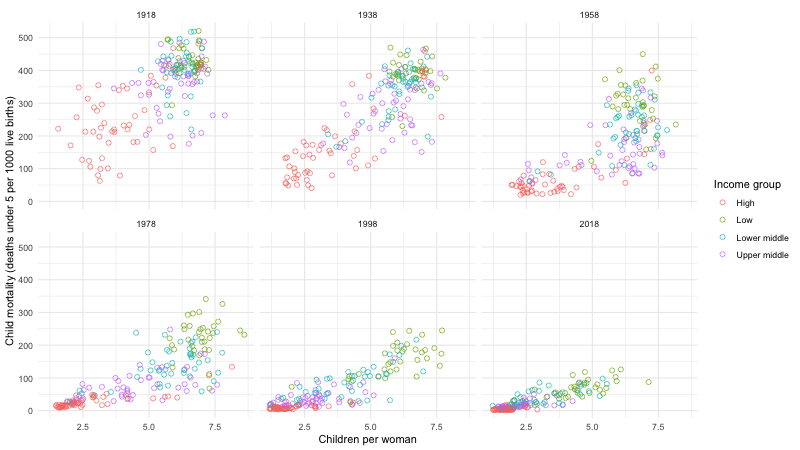

In [9]:
%%R -w 800 -h 450
# YOUR R ANSWER GOES HERE
library(readr)
library(dplyr)
library(ggplot2)

# Load data
url <- "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
gap <- read_csv(url, show_col_types = FALSE)

# Keep only the required years
years_keep <- c(1918, 1938, 1958, 1978, 1998, 2018)

gap_42 <- gap %>%
  filter(year %in% years_keep) %>%
  mutate(year = factor(year))   # make year a categorical facet label

# Hollow-circle scatter + facet into 3 columns x 2 rows
ggplot(gap_42, aes(x = children_per_woman, y = child_mortality, color = income_group)) +
  geom_point(shape = 1, size = 2, alpha = 0.8) +     # shape=1 is hollow circle
  facet_wrap(~ year, ncol = 3) +
  labs(
    x = "Children per woman",
    y = "Child mortality (deaths under 5 per 1000 live births)",
    color = "Income group"
  ) +
  theme_minimal()

YOUR ANSWER TO 4 GOES HERE

From 1918 to 2018, the scatter plots show a clear negative relationship between child mortality and children per woman. In earlier years (1918, 1938), many countries have both high child mortality and high fertility. Over time, the whole cloud of points shifts down and left, meaning child mortality decreases and fertility also decreases.

This supports the introduction’s claim that lowering child mortality is associated with smaller family sizes. Parents may choose to have fewer children when they expect more children to survive. However, this plot does not prove causation. Many other factors also change over time (income, education, health care, women’s rights), and they can affect both child mortality and fertility. So the evidence is consistent with the introduction, but it is correlation, not a causal conclusion.

# 5. Carbon dioxide emissions

CO2 emissions are often talked about in it's relation to climate change.
Let's explore the data to see which countries emits the most CO2 per capita
and which regions has emitted the most in total over time.

<div class="alert alert-info" style="color:black">

### Question 5.1
rubric={accuracy:1,quality:1,viz:2}

<h4>
Python
</h4>
<ol type="1">
<li>Filter the data to include only the most recent year when <code>'co2_per_capita'</code> was measured (it is up to you how you find out which year this is).</li>
<li>Use the data frame <code>nlargest</code> method to select the top 40 countries in CO2 production per capita for that year.</li>
<li>Since we have only one value per country per year, let’s create a bar chart to visualize it. Encode the CO2 per capita as on the x-axis, the country on the y-axis, and the region as the color.</li>
<li>Sort your bar chart so that the highest CO2 per capita is the closest to the x-axis (the bottom of the chart). <a href="https://altair-viz.github.io/gallery/bar_chart_sorted.html">Here is an example of how to sort in Altair</a>.</li>
</ol>
</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs

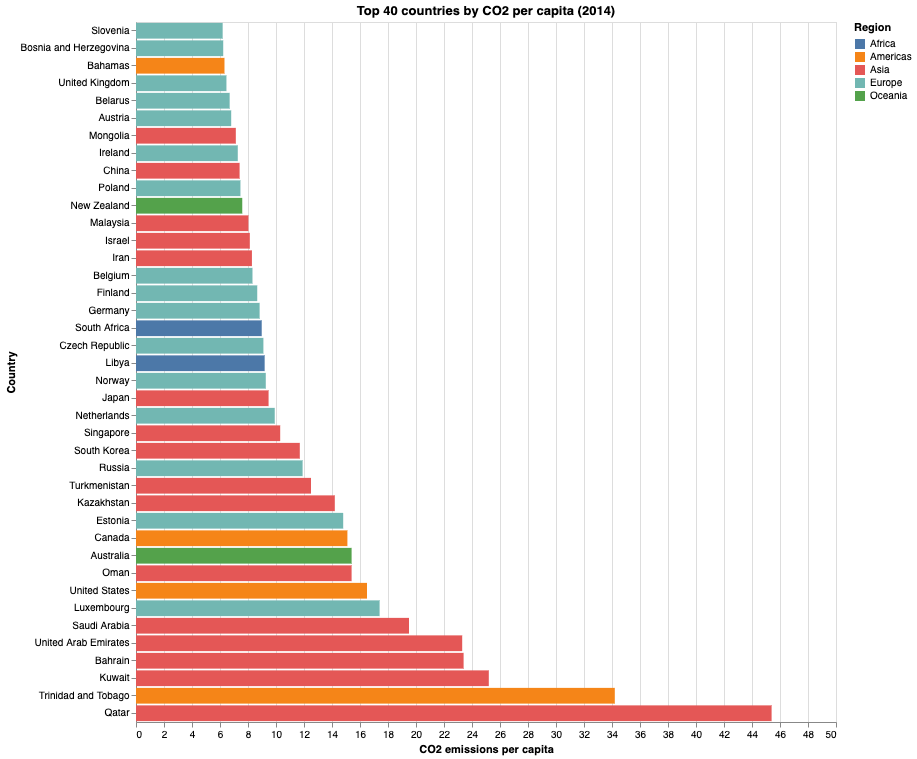

In [10]:
# YOUR PYTHON ANSWER GOES HERE
import pandas as pd
import altair as alt

# Load data
url = "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
df = pd.read_csv(url, parse_dates=["year"])

# 1) Find the most recent year where co2_per_capita was measured (has non-missing values)
latest_year = df.loc[df["co2_per_capita"].notna(), "year"].max()

# Filter to that year
df_latest = df[df["year"] == latest_year].copy()

# 2) Select the top 40 countries by CO2 per capita for that year
top40 = df_latest.nlargest(40, "co2_per_capita").copy()

# 3-4) Bar chart: x = co2_per_capita, y = country, color = region
# Sort so the highest value is closest to the x-axis (bottom of the chart)
chart_51 = (
    alt.Chart(top40)
    .mark_bar()
    .encode(
        x=alt.X("co2_per_capita:Q", title="CO2 emissions per capita"),
        y=alt.Y("country:N", sort=alt.SortField(field="co2_per_capita", order="ascending"), title="Country"),
        color=alt.Color("region:N", title="Region"),
        tooltip=["country:N", "region:N", "co2_per_capita:Q", alt.Tooltip("year:T", title="Year")]
    )
    .properties(
        title=f"Top 40 countries by CO2 per capita ({latest_year.year})",
        width=700,
        height=700
    )
)

chart_51

<div class="alert alert-success" style="color:black">

### Question 5.2
rubric={accuracy:1,quality:1,viz:2}

<h4>
R
</h4>
<ol type="1">
<li>Filter the data to include only the most recent year when <code>'co2_per_capita'</code> was measured (it is up to you how you find out which year this is).</li>
<li>Use the <code>slice_max</code> function from dplyr to select the top 40 countries in CO2 production per capita for that year.</li>
<li>Since we have only one value per country per year, let’s create a bar chart to visualize it. Set the aesthetics so that the CO2 per capita is on the x-axis, the country is on the y-axis, and the region is the color (you can use <code>fill</code> instead of <code>color</code> to get rid of the black outlines).</li>
<li>Sort your bar chart so that the highest CO2 per capita is the closest to the x-axis (the bottom of the chart). <a href="https://stackoverflow.com/questions/25664007/reorder-bars-in-geom-bar-ggplot2-by-value">Here is an example of how to sort in ggplot using the base R function <code>reorder</code></a>.</li>
</ol>

<p>See <a href=https://stackoverflow.com/a/59009108/2166823> this SO answer</a> if you are having issues creating the bar chart.</p>

</div>

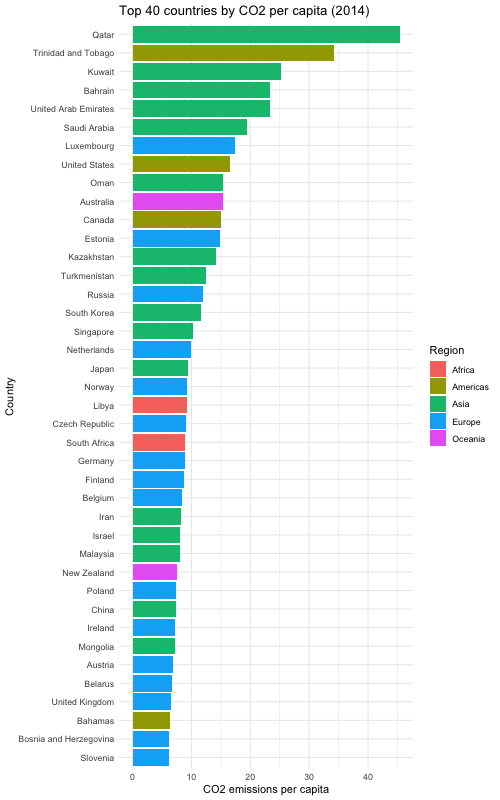

In [11]:
%%R -w 500 -h 800
# YOUR R ANSWER GOES HERE
library(readr)
library(dplyr)
library(ggplot2)

# Load data
url <- "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
gap <- read_csv(url, show_col_types = FALSE)

# 1) Find the most recent year where co2_per_capita was measured
latest_year <- gap %>%
  filter(!is.na(co2_per_capita)) %>%
  summarise(latest = max(year, na.rm = TRUE)) %>%
  pull(latest)

# 2) Keep only that year and take top 40 by co2_per_capita
top40 <- gap %>%
  filter(year == latest_year, !is.na(co2_per_capita)) %>%
  slice_max(order_by = co2_per_capita, n = 40, with_ties = FALSE) %>%
  # 4) Sort so the largest is at the bottom of the chart
  mutate(country = reorder(country, co2_per_capita))

# 3) Bar chart: x=co2_per_capita, y=country, fill=region (no black outlines)
ggplot(top40, aes(x = co2_per_capita, y = country, fill = region)) +
  geom_col(color = NA) +
  labs(
    title = paste0("Top 40 countries by CO2 per capita (", latest_year, ")"),
    x = "CO2 emissions per capita",
    y = "Country",
    fill = "Region"
  ) +
  theme_minimal()

<div class="alert alert-info" style="color:black">

### Question 5.3
rubric={accuracy:1,quality:1,viz:2}

<h4>
Python
</h4>
<ol type="1">
<li>in addition to the co2 per capita, the total population also matter for a country’s overall co2 emissions. compute a new column in your data set called <code>'co2_total'</code> which contains the total co2 emissions per observation.</li>
<li>plot this new column over time in an area chart, but instead of plotting one area for each country, plot one for each region which represents the sum of all countries co2 emissions in that region.</li>
</ol>
</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


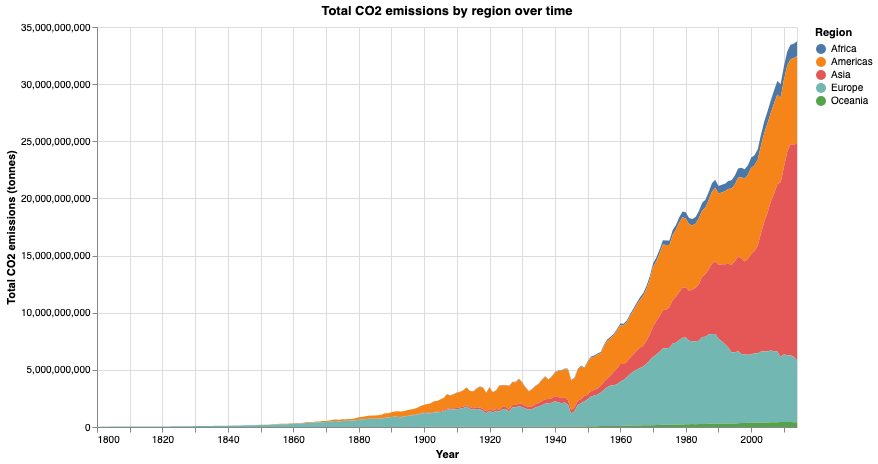

In [12]:
# YOUR PYTHON ANSWER GOES HERE
import pandas as pd
import altair as alt

url = "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
df = pd.read_csv(url)

# Ensure year is treated as time for Altair (works well if year is a datetime)
df["year"] = pd.to_datetime(df["year"], format="%Y")

# 1) Total CO2 per observation = co2_per_capita * population
# (co2_per_capita is tonnes per person; population is people)
df["co2_total"] = df["co2_per_capita"] * df["population"]

# 2) Sum total CO2 by region and year
region_year = (
    df.dropna(subset=["co2_total", "region", "year"])
      .groupby(["region", "year"], as_index=False)["co2_total"]
      .sum()
)

# Area chart: one area per region, showing summed co2_total over time
area = (
    alt.Chart(region_year)
    .mark_area()
    .encode(
        x=alt.X("year:T", title="Year"),
        y=alt.Y("co2_total:Q", title="Total CO2 emissions (tonnes)"),
        color=alt.Color("region:N", title="Region"),
        tooltip=[
            alt.Tooltip("year:T", title="Year"),
            alt.Tooltip("region:N", title="Region"),
            alt.Tooltip("co2_total:Q", title="Total CO2 (tonnes)", format=",.0f"),
        ],
    )
    .properties(width=700, height=400, title="Total CO2 emissions by region over time")
)

area

<div class="alert alert-success" style="color:black">

### Question 5.4
rubric={accuracy:1,quality:1,viz:2}

<h4>
R
</h4>
<ol type="1">
<li>in addition to the co2 per capita, the total population also matter for a country’s overall co2 emissions. compute a new column in your data set called <code>'co2_total'</code> which contains the total co2 emissions per observation.</li>
<li>plot this new column over time in an area chart, but instead of plotting one area for each country, plot one for each region which represents the sum of all countries co2 emissions in that region. In order for the areas to stack, you will have to set `position='stack'`.</li>
</ol>
    
<p><a href=https://stackoverflow.com/a/44226841/2166823> See this link if you want to read some background info on on when to use `geom_*` and when to use `stat_summary()`</a></p>
    
</div>

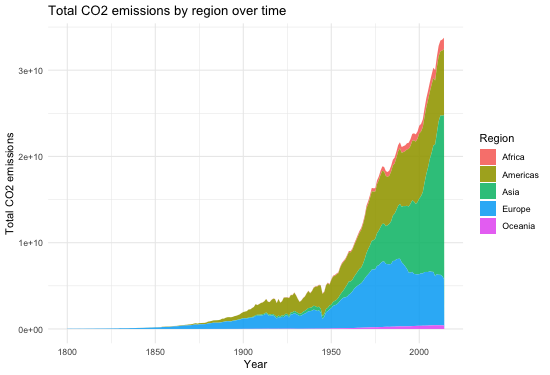

In [13]:
%%R -w 550 -h 375
# YOUR R ANSWER GOES HERE
library(readr)
library(dplyr)
library(ggplot2)

# 1) Load data
url <- "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
gap <- read_csv(url, show_col_types = FALSE)

# 2) Compute total CO2 emissions per observation
gap2 <- gap %>%
  filter(!is.na(co2_per_capita), !is.na(population), !is.na(region), !is.na(year)) %>%
  mutate(co2_total = co2_per_capita * population)

# 3) Sum total CO2 by region over time
region_year <- gap2 %>%
  group_by(year, region) %>%
  summarise(co2_total = sum(co2_total, na.rm = TRUE), .groups = "drop")

# 4) Stacked area chart
ggplot(region_year, aes(x = year, y = co2_total, fill = region)) +
  geom_area(position = "stack", alpha = 0.9) +
  labs(
    title = "Total CO2 emissions by region over time",
    x = "Year",
    y = "Total CO2 emissions",
    fill = "Region"
  ) +
  theme_minimal()

# 6. Income distribution

In his talk back in 2003, Rosling showed a projection of how the world income distribution would look like in 2015. Let’s eyeball if the suggested trend was accurate.

<div class="alert alert-warning" style="color:black">

### Question 6.1 (Optional)
rubric={accuracy:1,viz:1}

<h4>Python</h4>
<ol type="1">
<li>Wrangle your data to include the years 1979, 1991, 2003 and 2015.</li>
<li>Create a histogram (binned bar chart) of the income distribution with an appropriate number of bins.</li>
<li>Facet by year and make the plots smaller so that they fit in a single row.</li>
<li>It is a little hard to tell if the data is exactly the same as the prediction since we are not using a log scale and a histogram instead of a density plot (we’ll learn about these things later). But in general, briefly explain whether you think the trend is the same or not?</li>
</ol>
</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs

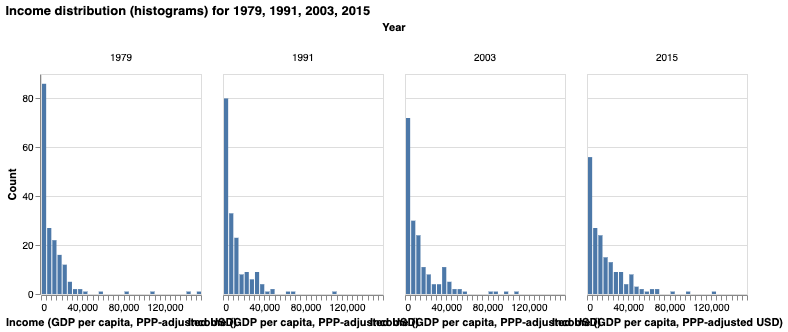

In [14]:
# YOUR PYTHON ANSWER GOES HERE
import pandas as pd
import altair as alt

# Data URL
url = "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"

# Load data
df = pd.read_csv(url, parse_dates=["year"])

# Keep only the requested years
years_keep = [1979, 1991, 2003, 2015]
df["year_int"] = df["year"].dt.year
df_sub = df[df["year_int"].isin(years_keep)].copy()

# Drop missing or non-positive incomes (histogram needs numeric values)
df_sub = df_sub.dropna(subset=["income"])
df_sub = df_sub[df_sub["income"] > 0]

# Histogram faceted by year (one row)
bins = 40  # "appropriate number of bins" (feel free to change to 30 or 50)

hist = (
    alt.Chart(df_sub)
    .mark_bar()
    .encode(
        x=alt.X("income:Q", bin=alt.Bin(maxbins=bins), title="Income (GDP per capita, PPP-adjusted USD)"),
        y=alt.Y("count():Q", title="Count"),
    )
    .properties(width=160, height=220)
)

chart_6_1 = (
    hist.facet(
        column=alt.Column("year_int:O", title="Year", sort=years_keep)
    )
    .properties(title="Income distribution (histograms) for 1979, 1991, 2003, 2015")
)

chart_6_1


Overall, the trend is broadly consistent with Rosling’s prediction: over time the income distribution shifts to the right, suggesting higher typical incomes in 2015 compared with earlier years. However, because this plot uses a linear x-axis and a histogram (not a log scale or density curve), most observations are compressed near the low-income end and the long right tail dominates the scale. So the exact shape is hard to compare, but the general shift toward higher incomes appears real.

<div class="alert alert-warning" style="color:black">

### Question 6.2 (Optional)
rubric={accuracy:1,viz:1}

<h4>R</h4>
<ol type="1">
<li>Wrangle your data to include the years 1979, 1991, 2003 and 2015.</li>
<li>Create a histogram (binned bar chart) of the income distribution with an appropriate number of bins.</li>
<li>Facet by year and make the plots smaller so that they fit in a single row.</li>
<li>It is a little hard to tell if the data is exactly the same as the prediction since we are not using a log scale and a histogram instead of a density plot (we’ll learn about these things later). But in general, briefly explain whether you think the trend is the same or not?</li>
</ol>
</div>

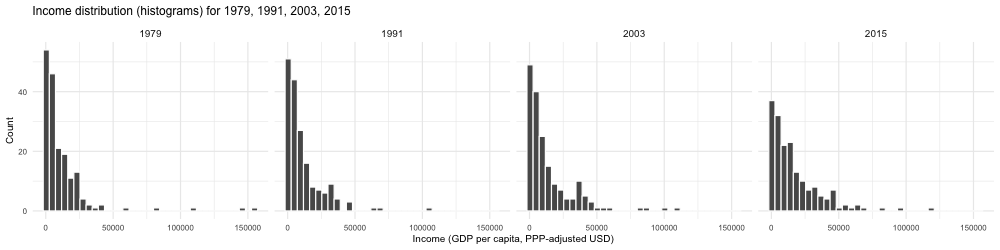

In [15]:
%%R -w 1000 -h 250
# YOUR R ANSWER GOES HERE
library(readr)
library(dplyr)
library(ggplot2)

# 1) Load data
url <- "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
gap <- read_csv(url, show_col_types = FALSE)

# 2) Keep only the target years
years_keep <- c(1979, 1991, 2003, 2015)

gap_sel <- gap %>%
  filter(year %in% years_keep) %>%
  filter(!is.na(income)) %>%
  mutate(year = factor(year, levels = years_keep))

# 3) Histogram + facet in one row
ggplot(gap_sel, aes(x = income)) +
  geom_histogram(bins = 35, color = "white") +
  facet_wrap(~ year, nrow = 1) +
  labs(
    title = "Income distribution (histograms) for 1979, 1991, 2003, 2015",
    x = "Income (GDP per capita, PPP-adjusted USD)",
    y = "Count"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(size = 12),
    axis.title = element_text(size = 10),
    axis.text = element_text(size = 8),
    strip.text = element_text(size = 10)
  )


Overall, the income distribution shifts to the right from 1979 to 2015, suggesting that typical incomes increased over time. The distribution remains highly right-skewed, with many countries clustered at lower income levels and a long tail of high-income countries. Because we are using a linear x-axis and histograms, the low-income part is compressed, so the exact shape is hard to compare, but the rightward shift is clear.

# 7. Chart beautification


Let's make our charts from question 2 look more like the Gapminder bubble chart! Beautifying charts can take a long time, but it is also satisfying when you end up with a really nice looking chart in the end. We will learn more about how to create charts for communication later, but these parameters are usually enough to create basic communication charts and to help you in your data exploration.

<div class="alert alert-info" style="color:black">

### Question 7.1
rubric={accuracy:2,quality:1,viz:1}

<h4>
Python
</h4>
<ol type="1">
<li>Copy in your code from question 2.1 and confirm that your scatter plot is generated properly so that you didn't miss to copy anything.</li>
<li>Add a title of your choice to the chart.</li>
<li>Set the x-axis and y-axis scale so that they don’t include zero and are zoomed in to the extent of the data instead.</li>
<li>Set proper titles for the axis and the legends, which include spaces instead of underscores and are capitalized.</li>
<li>Some of the dots are really hard to see because they are so small and it is a bit difficult to distinguish the changes in size as well. Let’s make everything bigger and emphasize the size difference by using the <a href="https://altair-viz.github.io/gallery/airport_connections.html">range argument to <code>alt.Scale</code></a> (there is a lot of other things going on in this example, so just focus on how they specify <code>size</code>).</li>
<li>Enlarge the axis title font by finding and setting the <a href="https://altair-viz.github.io/user_guide/configuration.html?highlight=titlefont#axis-configuration">right parameter of <code>.configure_axis</code></a></li>
</ol>

</div>

/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs/data550/lib/python3.10/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/envs

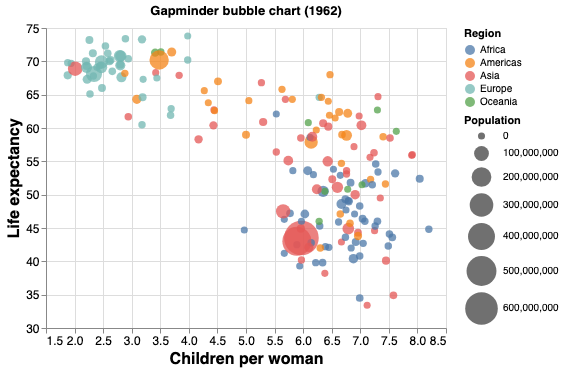

In [16]:
# YOUR PYTHON ANSWER GOES HERE
import pandas as pd
import altair as alt

# Load data
url = "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
gap = pd.read_csv(url, parse_dates=["year"])

# Filter to a single year: 1962
gap_1962 = gap[gap["year"].dt.year == 1962].copy()

# Build chart
chart_71 = (
    alt.Chart(gap_1962, title="Gapminder bubble chart (1962)")
    .mark_circle(opacity=0.75)
    .encode(
        # Zoom in to the data range (do not force zero)
        x=alt.X(
            "children_per_woman:Q",
            scale=alt.Scale(zero=False),
            title="Children per woman",
        ),
        y=alt.Y(
            "life_expectancy:Q",
            scale=alt.Scale(zero=False),
            title="Life expectancy",
        ),
        # Nice legend titles (capitalize + spaces)
        color=alt.Color("region:N", title="Region"),
        # Make bubbles more visible + emphasize size differences
        size=alt.Size(
            "population:Q",
            title="Population",
            scale=alt.Scale(range=[50, 1200]),
        ),
        tooltip=[
            alt.Tooltip("country:N", title="Country"),
            alt.Tooltip("region:N", title="Region"),
            alt.Tooltip("income_group:N", title="Income group"),
            alt.Tooltip("income:Q", title="Income (GDP per capita)", format=",.0f"),
            alt.Tooltip("life_expectancy:Q", title="Life expectancy", format=".1f"),
            alt.Tooltip("children_per_woman:Q", title="Children per woman", format=".2f"),
            alt.Tooltip("population:Q", title="Population", format=",.0f"),
        ],
    )
    # Make axis title fonts larger
    .configure_axis(titleFontSize=16, labelFontSize=12)
)

chart_71


<div class="alert alert-success" style="color:black">

### Question 7.2
rubric={accuracy:2,quality:1,viz:1}

<h4>
R
</h4>
 
<ol type="1">
<li>Copy in your code from question 2.2 and confirm that your scatter plot is generated properly so that you didn't miss to copy anything.</li>
<li>Add a title of your choice to the chart.</li>
<li>Set the <a href=https://ggplot2.tidyverse.org/reference/geom_point.html>transparency of the points</a> to an appropriate value, so that they are not completely obfuscating each other.</li>
<li>Set proper titles for the axis and the legends, which include spaces instead of underscores and are capitalized.</li>
<li>Change to a black and white theme.</li>
<li>Enlarge the text for all fonts (<a href=https://stackoverflow.com/a/34528522/2166823>See here if you need guidance)</a>.</li>
<li>Some of the dots are really hard to see because they are so small and it is a bit difficult to distinguish the changes in size as well. Let’s make everything bigger and emphasize the size difference by using the <a href="https://ggplot2.tidyverse.org/reference/scale_size.html"> <code>scale_size</code> function.</a></li>
</ol>
    
</div>

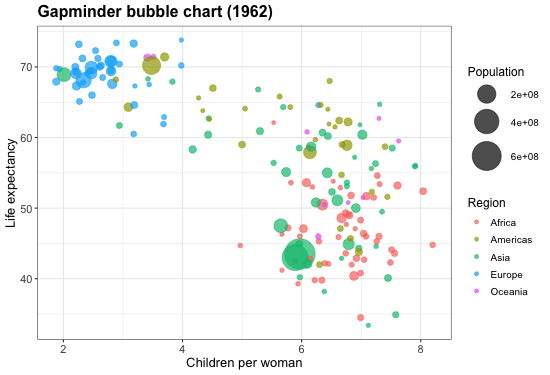

In [17]:
%%R -w 550 -h 375
# YOUR R ANSWER GOES HERE
library(readr)
library(dplyr)
library(ggplot2)

# Load the data
url <- "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
gap <- read_csv(url, show_col_types = FALSE)

# Keep only one year (1962)
gap_1962 <- gap %>% filter(year == 1962)

# Bubble chart (beautified)
ggplot(
  gap_1962,
  aes(
    x = children_per_woman,
    y = life_expectancy,
    color = region,
    size = population
  )
) +
  geom_point(alpha = 0.7) +  # Make points semi-transparent to reduce overplotting
  labs(
    title = "Gapminder bubble chart (1962)",
    x = "Children per woman",
    y = "Life expectancy",
    color = "Region",
    size = "Population"
  ) +
  theme_bw() +  # Use a clean black-and-white theme
  theme(
    plot.title = element_text(size = 16, face = "bold"),  # Larger title
    axis.title = element_text(size = 13),                 # Larger axis titles
    axis.text  = element_text(size = 11),                 # Larger tick labels
    legend.title = element_text(size = 12),               # Larger legend title
    legend.text  = element_text(size = 10)                # Larger legend labels
  ) +
  scale_size(
    range = c(1.5, 14)  # Increase the bubble size range to emphasize differences
  )